In [ ]:
# 2023.5.1
# reconstructed code 

# total random init
# poly function

In [ ]:
import os

cuda_device = '3'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train




In [ ]:
import torch.multiprocessing as mp
num_processes = 10



width_vector = [640, 1280]

result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
            result_matrix[i, idx, :] = [error, error_infty]

    

    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [4]:
print(result_matrix)

[[[2.77827872e-04 5.37287593e-02]
  [4.78210248e-04 7.60363936e-02]
  [3.75652016e-04 7.38623738e-02]
  [4.07602492e-04 8.94918442e-02]
  [3.96845600e-04 6.30677938e-02]
  [5.61388908e-04 5.97916245e-02]
  [8.54249301e-05 2.03118324e-02]
  [2.41319402e-04 4.24541235e-02]
  [3.56400385e-04 5.81921339e-02]
  [1.67767372e-04 3.83955836e-02]]

 [[1.12555477e-04 4.32419181e-02]
  [1.18009753e-04 4.57162857e-02]
  [6.99704397e-05 3.25756669e-02]
  [1.10949593e-04 3.18713784e-02]
  [2.56494404e-05 1.21757984e-02]
  [1.23499718e-04 2.98041105e-02]
  [1.02142039e-04 4.76557016e-02]
  [7.07562140e-05 2.63747573e-02]
  [3.46179149e-05 1.29399300e-02]
  [1.19361837e-04 5.55948615e-02]]]


(2, 10, 2)
0.05361295653287575
<class 'numpy.ndarray'>
0.0
[2.98340709e-04 7.92356131e-05]
[0.05361296 0.03039704]
y_min: [8.54249301e-05 2.56494404e-05]
y_max: [0.00056139 0.0001235 ]
[[2.12915779e-04 5.35861727e-05]
 [2.63048198e-04 4.42641049e-05]]


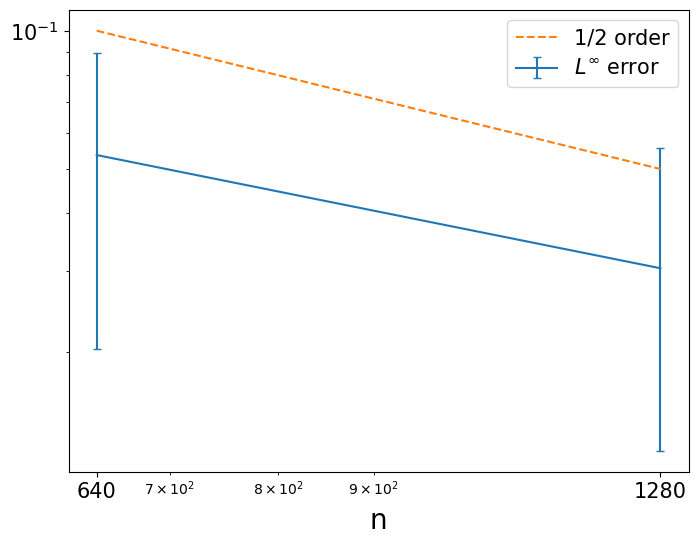

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]


ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()